# supervised learning 


In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('C:/Users/hp/Desktop/AI/Datasets/ecommerce_customer_churn_dataset.csv')

In [8]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [9]:
df.shape

(50000, 25)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase       47000 non-null 

In [11]:
df.isnull().sum().sort_values(ascending=False)

Social_Media_Engagement_Score    6000
Credit_Balance                   5500
Mobile_App_Usage                 5000
Returns_Rate                     4491
Wishlist_Items                   4000
Product_Reviews_Written          3500
Discount_Usage_Rate              3500
Session_Duration_Avg             3399
Pages_Per_Session                3000
Days_Since_Last_Purchase         3000
Email_Open_Rate                  2528
Payment_Method_Diversity         2500
Age                              2495
Customer_Service_Calls            168
Gender                              0
Country                             0
Membership_Years                    0
Cart_Abandonment_Rate               0
Login_Frequency                     0
City                                0
Average_Order_Value                 0
Total_Purchases                     0
Lifetime_Value                      0
Churned                             0
Signup_Quarter                      0
dtype: int64

In [12]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


<Axes: xlabel='Age'>

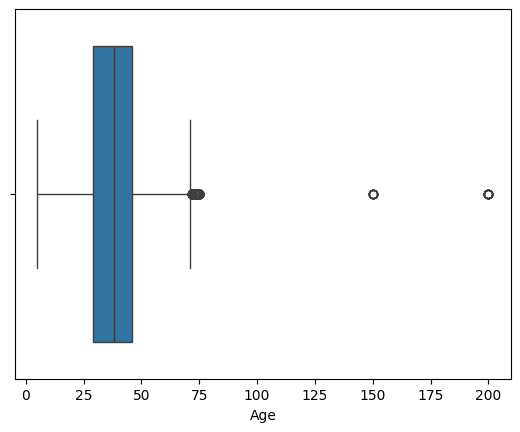

In [13]:
sns.boxplot(x = df['Age'])

In [14]:
df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Churned', 'Signup_Quarter'],
      dtype='object')

In [15]:
df[df['Age'] > 100].shape


(20, 25)

In [16]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,...,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,...,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,...,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,...,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [17]:
df['Age'].max()

np.float64(200.0)

In [18]:
df.drop(columns=[
    'Social_Media_Engagement_Score',
    'Mobile_App_Usage',
    'Credit_Balance'
], inplace=True)

In [19]:
df.isnull().sum()


Age                         2495
Gender                         0
Country                        0
City                           0
Membership_Years               0
Login_Frequency                0
Session_Duration_Avg        3399
Pages_Per_Session           3000
Cart_Abandonment_Rate          0
Wishlist_Items              4000
Total_Purchases                0
Average_Order_Value            0
Days_Since_Last_Purchase    3000
Discount_Usage_Rate         3500
Returns_Rate                4491
Email_Open_Rate             2528
Customer_Service_Calls       168
Product_Reviews_Written     3500
Payment_Method_Diversity    2500
Lifetime_Value                 0
Churned                        0
Signup_Quarter                 0
dtype: int64

In [20]:
df['Age'].fillna(df['Age'].median(), inplace=True)


In [21]:
df.isnull().sum().sort_values(ascending=False)


Returns_Rate                4491
Wishlist_Items              4000
Discount_Usage_Rate         3500
Product_Reviews_Written     3500
Session_Duration_Avg        3399
Pages_Per_Session           3000
Days_Since_Last_Purchase    3000
Email_Open_Rate             2528
Payment_Method_Diversity    2500
Customer_Service_Calls       168
Gender                         0
Age                            0
City                           0
Country                        0
Login_Frequency                0
Membership_Years               0
Cart_Abandonment_Rate          0
Average_Order_Value            0
Total_Purchases                0
Lifetime_Value                 0
Churned                        0
Signup_Quarter                 0
dtype: int64

In [22]:
num_cols = df.select_dtypes(include=['int64','float64']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

In [23]:
cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()

Age                         0
Gender                      0
Country                     0
City                        0
Membership_Years            0
Login_Frequency             0
Session_Duration_Avg        0
Pages_Per_Session           0
Cart_Abandonment_Rate       0
Wishlist_Items              0
Total_Purchases             0
Average_Order_Value         0
Days_Since_Last_Purchase    0
Discount_Usage_Rate         0
Returns_Rate                0
Email_Open_Rate             0
Customer_Service_Calls      0
Product_Reviews_Written     0
Payment_Method_Diversity    0
Lifetime_Value              0
Churned                     0
Signup_Quarter              0
dtype: int64

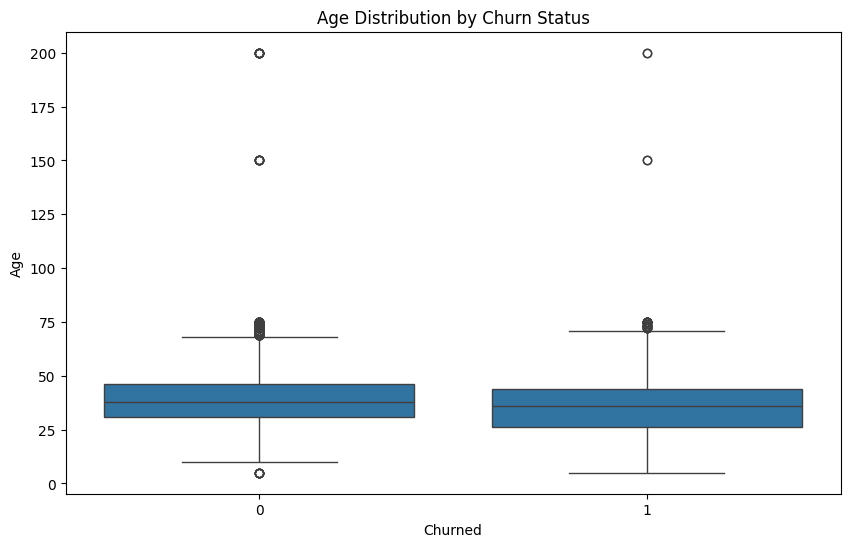

In [24]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churned', y='Age')



plt.title('Age Distribution by Churn Status')
plt.show()

In [25]:
df = df[df['Age'] <= 100]
print(f"Shape after removing age > 100: {df.shape}")

Shape after removing age > 100: (49980, 22)


In [26]:
df

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Payment_Method_Diversity,Lifetime_Value,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,34.0,46.40,2.0,17.9,9.0,4.0,1.0,953.33,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,71.0,57.96,9.2,42.8,7.0,3.0,3.0,1067.47,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,11.0,12.24,11.5,0.0,4.0,1.0,2.0,1289.75,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,47.0,44.10,5.4,41.4,2.0,5.0,3.0,2340.92,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,...,73.0,25.20,5.5,37.9,1.0,11.0,4.0,3041.29,0,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38.0,Female,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,...,18.0,62.70,5.4,9.2,5.0,1.0,1.0,2365.98,0,Q2
49996,37.0,Male,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,...,48.0,66.30,5.4,17.6,5.0,3.0,4.0,1293.60,0,Q3
49997,44.0,Female,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,...,7.0,40.20,10.7,25.2,4.0,6.0,1.0,1655.28,0,Q1
49998,41.0,Female,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,...,72.0,74.20,2.5,34.6,5.0,2.0,3.0,1286.11,0,Q2


In [27]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Payment_Method_Diversity,Lifetime_Value,Churned
count,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000,49980.000000
mean,37.756903,2.984089,11.625450,27.602797,8.718203,57.079010,4.274710,13.112349,123.121927,29.264446,41.876534,6.566370,20.877203,5.679512,2.793818,2.336295,1440.738958,0.289036
std,11.183306,2.059197,7.810733,10.497269,3.664032,16.281367,3.060526,7.017615,175.603137,28.868803,20.616221,5.872898,13.889674,2.671832,2.256640,1.084659,907.303273,0.453319
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.060000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,2.000000,789.927500,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,2.000000,1243.415000,0.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,3.000000,1874.187500,1.000000
max,75.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,5.000000,8987.240000,1.000000


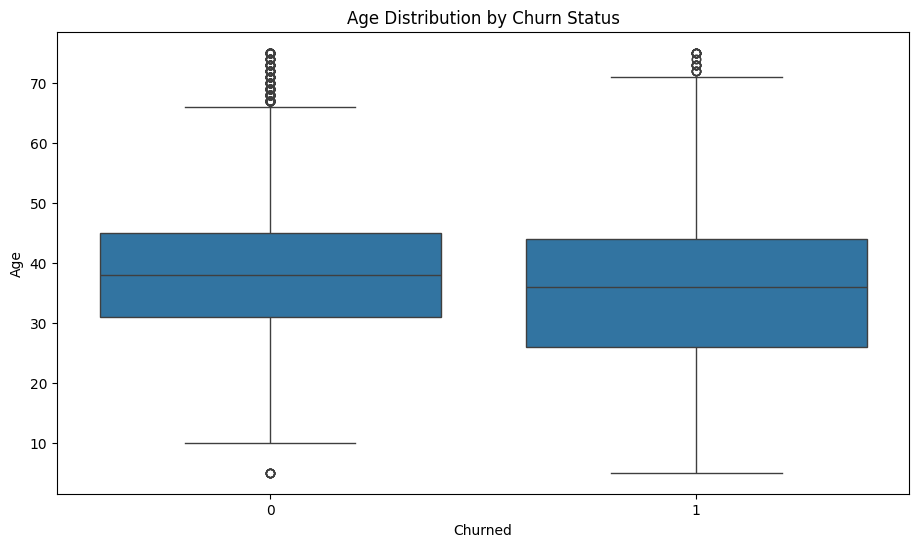

In [28]:
plt.figure(figsize=(11, 6))
sns.boxplot(data=df, x='Churned', y='Age')



plt.title('Age Distribution by Churn Status')
plt.show()

In [29]:
df.dtypes

Age                         float64
Gender                       object
Country                      object
City                         object
Membership_Years            float64
Login_Frequency             float64
Session_Duration_Avg        float64
Pages_Per_Session           float64
Cart_Abandonment_Rate       float64
Wishlist_Items              float64
Total_Purchases             float64
Average_Order_Value         float64
Days_Since_Last_Purchase    float64
Discount_Usage_Rate         float64
Returns_Rate                float64
Email_Open_Rate             float64
Customer_Service_Calls      float64
Product_Reviews_Written     float64
Payment_Method_Diversity    float64
Lifetime_Value              float64
Churned                       int64
Signup_Quarter               object
dtype: object

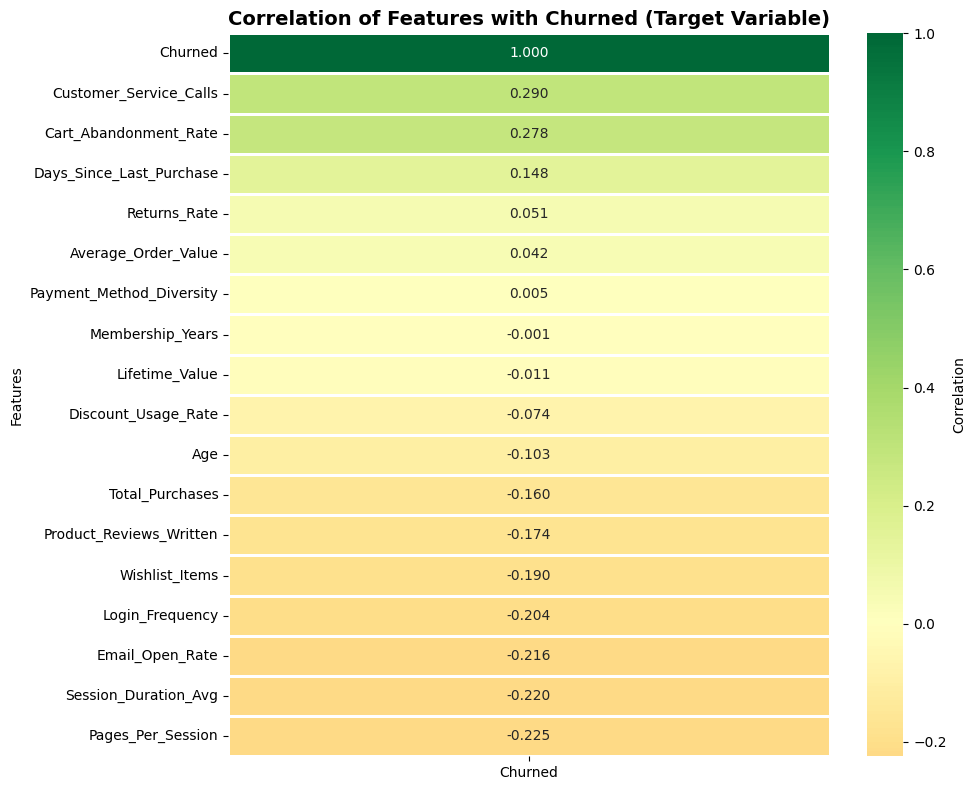


Top Positive Correlations with Churned:
Churned                     1.000000
Customer_Service_Calls      0.290378
Cart_Abandonment_Rate       0.277859
Days_Since_Last_Purchase    0.148071
Returns_Rate                0.051078
Average_Order_Value         0.042323
Name: Churned, dtype: float64

Top Negative Correlations with Churned:
Wishlist_Items         -0.189564
Login_Frequency        -0.204360
Email_Open_Rate        -0.216241
Session_Duration_Avg   -0.219532
Pages_Per_Session      -0.224717
Name: Churned, dtype: float64


In [30]:
# Correlation with Churned (target variable)
correlation_with_churned = df.corr(numeric_only=True)['Churned'].sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_churned.to_frame(), annot=True, fmt='.3f', cmap='RdYlGn', center=0, 
            linewidths=1, cbar_kws={'label': 'Correlation'})
plt.title('Correlation of Features with Churned (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

print("\nTop Positive Correlations with Churned:")
print(correlation_with_churned.head(6))
print("\nTop Negative Correlations with Churned:")
print(correlation_with_churned.tail(5))

# Data Preprocessing

In [31]:
df_cleaned = df.copy()

In [32]:
df_cleaned.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Payment_Method_Diversity,Lifetime_Value,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,34.0,46.40,2.0,17.9,9.0,4.0,1.0,953.33,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,71.0,57.96,9.2,42.8,7.0,3.0,3.0,1067.47,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,11.0,12.24,11.5,0.0,4.0,1.0,2.0,1289.75,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,47.0,44.10,5.4,41.4,2.0,5.0,3.0,2340.92,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,...,73.0,25.20,5.5,37.9,1.0,11.0,4.0,3041.29,0,Q4


In [33]:
df_cleaned.drop_duplicates(inplace=True)

In [34]:
df_cleaned.shape

(49980, 22)

In [35]:
df_cleaned.isnull().sum()

Age                         0
Gender                      0
Country                     0
City                        0
Membership_Years            0
Login_Frequency             0
Session_Duration_Avg        0
Pages_Per_Session           0
Cart_Abandonment_Rate       0
Wishlist_Items              0
Total_Purchases             0
Average_Order_Value         0
Days_Since_Last_Purchase    0
Discount_Usage_Rate         0
Returns_Rate                0
Email_Open_Rate             0
Customer_Service_Calls      0
Product_Reviews_Written     0
Payment_Method_Diversity    0
Lifetime_Value              0
Churned                     0
Signup_Quarter              0
dtype: int64

In [36]:
df_cleaned.dtypes

Age                         float64
Gender                       object
Country                      object
City                         object
Membership_Years            float64
Login_Frequency             float64
Session_Duration_Avg        float64
Pages_Per_Session           float64
Cart_Abandonment_Rate       float64
Wishlist_Items              float64
Total_Purchases             float64
Average_Order_Value         float64
Days_Since_Last_Purchase    float64
Discount_Usage_Rate         float64
Returns_Rate                float64
Email_Open_Rate             float64
Customer_Service_Calls      float64
Product_Reviews_Written     float64
Payment_Method_Diversity    float64
Lifetime_Value              float64
Churned                       int64
Signup_Quarter               object
dtype: object

In [37]:
df_cleaned['Gender'].value_counts()

Gender
Female    25106
Male      23937
Other       937
Name: count, dtype: int64

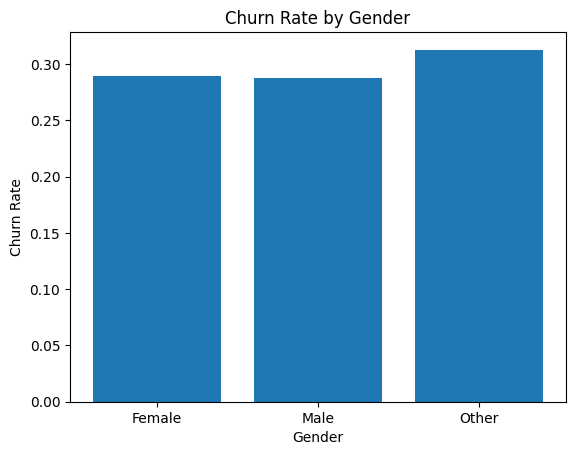

In [38]:

churn_by_gender = df_cleaned.groupby('Gender')['Churned'].mean().reset_index()

plt.bar(
    churn_by_gender['Gender'],
    churn_by_gender['Churned']
)

plt.xlabel('Gender')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Gender')
plt.show()

In [39]:
df_cleaned = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [40]:
df_cleaned

,Age,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Payment_Method_Diversity,Lifetime_Value,Churned,Signup_Quarter,Gender_Male,Gender_Other
0,43.0,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,...,2.0,17.9,9.0,4.0,1.0,953.33,0,Q1,True,False
1,36.0,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,...,9.2,42.8,7.0,3.0,3.0,1067.47,0,Q4,True,False
2,45.0,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,...,11.5,0.0,4.0,1.0,2.0,1289.75,0,Q4,False,False
3,56.0,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,...,5.4,41.4,2.0,5.0,3.0,2340.92,0,Q1,False,False
4,35.0,India,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,32.5,...,5.5,37.9,1.0,11.0,4.0,3041.29,0,Q4,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,38.0,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,13.0,...,5.4,9.2,5.0,1.0,1.0,2365.98,0,Q2,False,False
49996,37.0,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,15.0,...,5.4,17.6,5.0,3.0,4.0,1293.60,0,Q3,True,False
49997,44.0,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,12.0,...,10.7,25.2,4.0,6.0,1.0,1655.28,0,Q1,False,False
49998,41.0,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,12.0,...,2.5,34.6,5.0,2.0,3.0,1286.11,0,Q2,False,False


In [41]:
df_cleaned['Country'].nunique()


8

In [42]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['Country'], drop_first=True)


In [43]:
df_cleaned.head(
    
)

,Age,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,...,Signup_Quarter,Gender_Male,Gender_Other,Country_Canada,Country_France,Country_Germany,Country_India,Country_Japan,Country_UK,Country_USA
0,43.0,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,94.72,...,Q1,True,False,False,True,False,False,False,False,False
1,36.0,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,82.45,...,Q4,True,False,False,False,False,False,False,True,False
2,45.0,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,165.52,...,Q4,False,False,True,False,False,False,False,False,False
3,56.0,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,147.33,...,Q1,False,False,False,False,False,False,False,False,True
4,35.0,Delhi,3.1,29.0,51.4,8.4,19.1,9.0,32.5,141.30,...,Q4,True,False,False,False,False,True,False,False,False


In [44]:
df_cleaned = pd.get_dummies(df_cleaned, columns=['City'], drop_first=True)


In [45]:
df_cleaned.head()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
0,43.0,2.9,14.0,27.4,6.0,50.6,3.0,9.0,94.72,34.0,...,False,False,False,False,False,False,False,False,False,False
1,36.0,1.6,15.0,42.7,10.3,37.7,1.0,19.5,82.45,71.0,...,False,False,False,False,False,False,False,False,False,False
2,45.0,2.9,10.0,24.8,1.6,70.9,1.0,9.1,165.52,11.0,...,False,False,False,False,False,False,False,False,True,False
3,56.0,2.6,10.0,38.4,14.8,41.7,9.0,15.0,147.33,47.0,...,False,False,False,False,False,False,False,False,False,False
4,35.0,3.1,29.0,51.4,8.4,19.1,9.0,32.5,141.30,73.0,...,False,False,False,False,False,False,False,False,False,False


In [46]:
quarter_mapping = {'Q1': 1, 'Q2': 2, 'Q3': 3, 'Q4': 4}
df_cleaned['Signup_Quarter'] = df_cleaned['Signup_Quarter'].map(quarter_mapping)

df_cleaned = df_cleaned.astype(int)

In [47]:
df_cleaned.head()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
0,43,2,14,27,6,50,3,9,94,34,...,0,0,0,0,0,0,0,0,0,0
1,36,1,15,42,10,37,1,19,82,71,...,0,0,0,0,0,0,0,0,0,0
2,45,2,10,24,1,70,1,9,165,11,...,0,0,0,0,0,0,0,0,1,0
3,56,2,10,38,14,41,9,15,147,47,...,0,0,0,0,0,0,0,0,0,0
4,35,3,29,51,8,19,9,32,141,73,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
df_cleaned.columns

Index(['Age', 'Membership_Years', 'Login_Frequency', 'Session_Duration_Avg',
       'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items',
       'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Churned',
       'Signup_Quarter', 'Gender_Male', 'Gender_Other', 'Country_Canada',
       'Country_France', 'Country_Germany', 'Country_India', 'Country_Japan',
       'Country_UK', 'Country_USA', 'City_Bangalore', 'City_Berlin',
       'City_Birmingham', 'City_Brisbane', 'City_Calgary', 'City_Chennai',
       'City_Chicago', 'City_Cologne', 'City_Delhi', 'City_Frankfurt',
       'City_Glasgow', 'City_Hamburg', 'City_Houston', 'City_Hyderabad',
       'City_Kyoto', 'City_Leeds', 'City_London', 'City_Los Angeles',
       'City_Lyon', 'City_Manchester', 'City_Marseille', 'City_Melbourne',
 

In [51]:
cols = ['Age','Membership_Years', 'Login_Frequency', 'Session_Duration_Avg',
       'Pages_Per_Session', 'Cart_Abandonment_Rate', 'Wishlist_Items',
       'Total_Purchases', 'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Payment_Method_Diversity', 'Lifetime_Value']

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [52]:
df_cleaned.head()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
0,0.468837,-0.256050,0.304014,-0.012316,-0.621055,-0.407086,-0.416504,-0.573398,-0.163018,0.164039,...,0,0,0,0,0,0,0,0,0,0
1,-0.157102,-0.733670,0.432044,1.415930,0.470233,-1.205390,-1.069993,0.859874,-0.231353,1.445712,...,0,0,0,0,0,0,0,0,0,0
2,0.647677,-0.256050,-0.208107,-0.297966,-1.985165,0.821073,-1.069993,-0.573398,0.241298,-0.632677,...,0,0,0,0,0,0,0,0,1,0
3,1.631296,-0.256050,-0.208107,1.035064,1.561522,-0.959758,1.543963,0.286565,0.138796,0.614356,...,0,0,0,0,0,0,0,0,0,0
4,-0.246522,0.221571,2.224468,2.272877,-0.075411,-2.310733,1.543963,2.723128,0.104628,1.514992,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X = df_cleaned.drop('Churned', axis=1)
y = df_cleaned['Churned']

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf_model =  RandomForestClassifier( n_estimators=500,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features="sqrt",
    class_weight={0: 1, 1: 2},
    random_state=42,
    n_jobs=-1)

In [58]:

rf_model.fit(X_train, y_train)

,n_estimators,500
,criterion,'gini'
,max_depth,12
,min_samples_split,10
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
y_proba = rf_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.4).astype(int)  # default is 0.5



In [60]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [61]:
acc = accuracy_score(y_test,y_pred)

In [62]:
acc

0.8792517006802721

In [63]:
confusion_matrix(y_test, y_pred)

array([[6307,  814],
       [ 393, 2482]])

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7121
           1       0.75      0.86      0.80      2875

    accuracy                           0.88      9996
   macro avg       0.85      0.87      0.86      9996
weighted avg       0.89      0.88      0.88      9996



In [65]:
from sklearn.ensemble import AdaBoostClassifier

In [66]:
ada_model =  AdaBoostClassifier(n_estimators=1000, random_state=42)

In [67]:
ada_model.fit(X_train, y_train)

,estimator,None
,n_estimators,1000
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [68]:
y_ada = ada_model.predict(X_test)

In [69]:
acc_ada = accuracy_score(y_test,y_ada)

In [70]:
acc_ada

0.8358343337334934

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:

gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [73]:
gb_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [74]:
y_gb = gb_model.predict(X_test)

In [75]:
acc_gb = accuracy_score(y_test, y_gb)

In [76]:
acc_gb

0.9164665866346539

In [77]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()

xgb_model = XGBClassifier(n_estimators=1000, learning_rate=0.5, max_depth=6, use_label_encoder=True, eval_metric='mlogloss', random_state=42)

     

In [78]:
xgb_model.fit(X_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [79]:
y_xg = xgb_model.predict(X_test)

In [80]:
acc_xg = accuracy_score(y_test,y_xg)

In [81]:
acc_xg


0.9112645058023209

In [82]:
print(classification_report(y_test,y_xg))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7121
           1       0.89      0.79      0.84      2875

    accuracy                           0.91      9996
   macro avg       0.90      0.88      0.89      9996
weighted avg       0.91      0.91      0.91      9996



In [83]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.94      0.89      0.91      7121
           1       0.75      0.86      0.80      2875

    accuracy                           0.88      9996
   macro avg       0.85      0.87      0.86      9996
weighted avg       0.89      0.88      0.88      9996



In [84]:
print(classification_report(y_test,y_gb
                            ))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7121
           1       0.93      0.77      0.84      2875

    accuracy                           0.92      9996
   macro avg       0.92      0.87      0.89      9996
weighted avg       0.92      0.92      0.91      9996



In [85]:
print("jup")

jup


In [86]:
df_cleaned.head()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,City_Ottawa,City_Paris,City_Perth,City_Phoenix,City_Sydney,City_Tokyo,City_Toronto,City_Toulouse,City_Vancouver,City_Yokohama
0,0.468837,-0.256050,0.304014,-0.012316,-0.621055,-0.407086,-0.416504,-0.573398,-0.163018,0.164039,...,0,0,0,0,0,0,0,0,0,0
1,-0.157102,-0.733670,0.432044,1.415930,0.470233,-1.205390,-1.069993,0.859874,-0.231353,1.445712,...,0,0,0,0,0,0,0,0,0,0
2,0.647677,-0.256050,-0.208107,-0.297966,-1.985165,0.821073,-1.069993,-0.573398,0.241298,-0.632677,...,0,0,0,0,0,0,0,0,1,0
3,1.631296,-0.256050,-0.208107,1.035064,1.561522,-0.959758,1.543963,0.286565,0.138796,0.614356,...,0,0,0,0,0,0,0,0,0,0
4,-0.246522,0.221571,2.224468,2.272877,-0.075411,-2.310733,1.543963,2.723128,0.104628,1.514992,...,0,0,0,0,0,0,0,0,0,0


In [87]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [88]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "svm (rbf)": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    
}

In [89]:
results = []

In [90]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'F1 Score': round(f1, 4)
    })

In [91]:
results

[{'Model': 'Logistic Regression', 'Accuracy': 0.7715, 'F1 Score': 0.5088},
 {'Model': 'Gaussian Naive Bayes', 'Accuracy': 0.6603, 'F1 Score': 0.5022},
 {'Model': 'Decision Tree', 'Accuracy': 0.8466, 'F1 Score': 0.74},
 {'Model': 'svm (rbf)', 'Accuracy': 0.8701, 'F1 Score': 0.7449},
 {'Model': 'K-Nearest Neighbors', 'Accuracy': 0.8109, 'F1 Score': 0.5949}]

In [92]:
df_cleaned.to_csv("newChurned.csv", index=False)
